In [3]:
import pandas as pd
import json
import numpy as np
import csv
import pickle
from itertools import islice
import operator
from math import sin, cos, sqrt, atan2, radians
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
with open('userRestaurantDict.pickle', 'rb') as handle:
    userRestaurantDict = pickle.load(handle)

In [5]:
def getMegaFriendDict():
    megaUserFriendDict = dict()
    userfile = open('user.json', 'r')
    for line in userfile:
        jsonObject = json.loads(line)
        friendList = jsonObject.get('friends')
        megaUserFriendDict[jsonObject.get('user_id')] = set(friendList)           
    userfile.close()
    return megaUserFriendDict

In [6]:
megaUserFriendDict = getMegaFriendDict()

In [23]:
with open('megaUserFriendDict.pickle', 'wb') as handle:
    pickle.dump(megaUserFriendDict, handle, protocol=2)

In [7]:
len(megaUserFriendDict)

1183362

In [8]:
def getAllUsersFromState(state):
    userResRatingDic = dict()
    userSet = set()
    userVisitedResStateWise = dict()
    resToUserDict = dict()
    f = open('States/'+state+'.txt','r')
    for line in f:
        userID , busID , rating = line.split('\t')
        userSet.add(userID)
        tup = (userID,busID)
        userResRatingDic[tup] = rating
        if userVisitedResStateWise.__contains__(userID) == False:
            temp = list()
            temp.append(busID)
            userVisitedResStateWise[userID] = temp
        else:
            temp = userVisitedResStateWise.get(userID)
            temp.append(busID)
            userVisitedResStateWise[userID] = temp
            
        if resToUserDict.__contains__(busID) == False:
            temp = list()
            temp.append(userID)
            resToUserDict[busID] = temp
        else:
            temp = resToUserDict.get(busID)
            temp.append(userID)
            resToUserDict[busID] = temp
        
    f.close()
    return userSet,userResRatingDic,userVisitedResStateWise,resToUserDict

In [9]:
def calculateSimilarityFriendsRatings(state):
    allUserFromStateSet = set()
    userResRatingDic = dict()
    userVisitedResStateWise = dict()
    resToUserDict = dict()
    allUserFromStateSet , userResRatingDic , userVisitedResStateWise, resToUserDict = getAllUsersFromState(state)
    userPlotList = list()
    friendPlotList = list()
    averagePlotList = list()
    for user in allUserFromStateSet:
        userVisitedResList = userVisitedResStateWise.get(user)
        userFriendList = megaUserFriendDict.get(user)
        for rest in userVisitedResList:
            friendAverage = 0
            totalResFriend = 0
            notFriendAverage = 0
            notResFriend = 0
            for friend in userFriendList:
                tup = (friend, rest)
                if userResRatingDic.__contains__(tup):
                    ratingfriend = userResRatingDic.get(tup)
                    friendAverage += float(ratingfriend)
                    totalResFriend += 1
                    
            if totalResFriend == float(0):
                continue
                
            friendAverage = friendAverage / totalResFriend 
                
            userOfARes = resToUserDict.get(rest)
            for otherUser in userOfARes:
                if otherUser != user and otherUser not in userFriendList:
                    tup = (otherUser, rest)
                    if userResRatingDic.__contains__(tup):
                        ratingOtherUser = userResRatingDic.get(tup)
                        notFriendAverage += float(ratingOtherUser)
                        notResFriend += 1
                        
            if notResFriend == float(0):
                continue
            notFriendAverage = notFriendAverage / notResFriend

            ratinguser = userResRatingDic.get((user,rest))
            userPlotList.append(float(ratinguser))
            friendPlotList.append(friendAverage)
            averagePlotList.append(notFriendAverage)
                
    return userPlotList , friendPlotList , averagePlotList

In [10]:
def getPlotLists(state):
    userPlotList , friendPlotList , averagePlotList = calculateSimilarityFriendsRatings(state)
    return userPlotList , friendPlotList , averagePlotList

In [19]:
userPlotList , friendPlotList , averagePlotList = getPlotLists('WI')

In [103]:
def plot(a,b):
    plt.scatter(a,b , s=1,c="magenta")
    plt.xlabel("User's Rating")
    plt.ylabel("Average Friend Rating")
    plt.show()

In [104]:
np.corrcoef(userPlotList,friendPlotList)[0][1]

0.40108717602512794

In [105]:
# EDH - 0.43
# PA - 0.34
# WI - 0.32
# NV - 0.35
# QC - 0.354
# OH - 0.36
# ON - 0.34
# BW - 0.45
# IL - 0.40

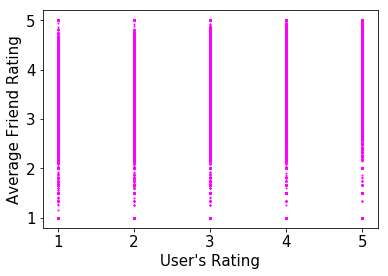

In [89]:
plot(userPlotList , friendPlotList)

In [272]:
def makeUserFriendAveragePlot(userPlotList , friendPlotList , averagePlotList):
    userPlotListLength = len(userPlotList)
    xAxisList = [i for i in range(userPlotListLength)]
    plt.scatter(xAxisList, userPlotList , label='User\'s Ratings',s=20)
#     plt.scatter(xAxisList, friendPlotList, label='User\'s Friends Ratings',s=20)
#     plt.scatter(xAxisList, averagePlotList , label='Average Res Ratings',s=20)
    plt.legend(loc='upper left')
    fig = plt.gcf()
    fig.set_size_inches(10.5,10.5)

In [228]:
def makeUserFriendAverageLinePlot(userPlotList , friendPlotList , averagePlotList):
    userPlotListLength = len(userPlotList)
    xAxisList = [i for i in range(userPlotListLength)]
    plt.plot(xAxisList, userPlotList , label='User\'s Ratings')
    plt.plot(xAxisList, friendPlotList, label='User\'s Friends Ratings')
    plt.plot(xAxisList, averagePlotList , label='Average Res Ratings')
    plt.legend(loc='upper left')
    fig = plt.gcf()
    fig.set_size_inches(10.5,10.5)

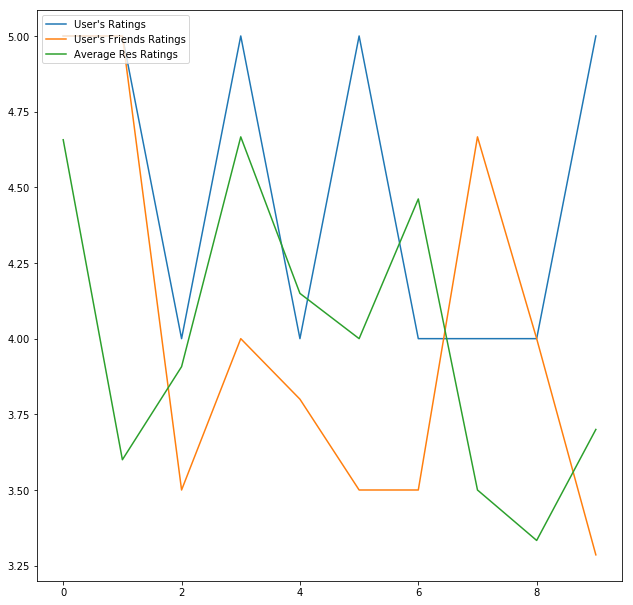

In [325]:
upto = 10
makeUserFriendAverageLinePlot(userPlotList[:upto] , friendPlotList[:upto] , averagePlotList[:upto])

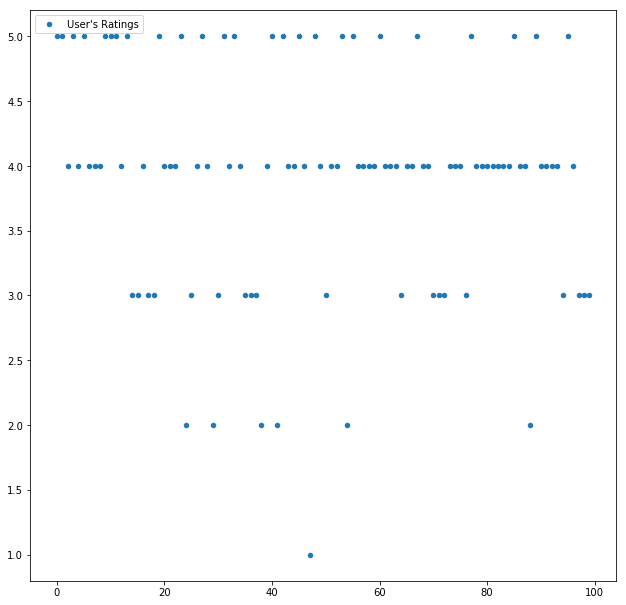

In [274]:
upto = 100
makeUserFriendAveragePlot(userPlotList[:upto] , friendPlotList[:upto] , averagePlotList[:upto])

In [51]:
np.corrcoef(userPlotList,friendPlotList)

array([[ 1.        ,  0.34351502],
       [ 0.34351502,  1.        ]])

In [196]:
a = 0
b = 0
for i in range(len(userPlotList)):
    a += abs(userPlotList[i] - friendPlotList[i])
    b += abs(userPlotList[i] - averagePlotList[i])
print(a/len(userPlotList), "===============", b/len(userPlotList))

0.8506702046587706 =============== 0.8516298985320394


# deepak ======================

In [178]:
with open('userStateAllRestaurantdict.pickle', 'rb') as handle:
    userStateAllRestaurantdict = pickle.load(handle)
    
with open('userRestaurantDict.pickle', 'rb') as handle:
    userRestaurantDict = pickle.load(handle)

with open('businessToUserRatingDict.pickle', 'rb') as handle:
    businessToUserRatingDict = pickle.load(handle)

In [179]:
businessIdVsStarDict = dict()
f = open('restaurant.json', 'r')
for line in f:
    jsonObject = json.loads(line)
    businessIdVsStarDict[jsonObject.get('business_id')] = jsonObject.get('stars')
f.close()

In [255]:
#get visited restaurants for a user from state
def getVisitedFromState(userId,state):
    temp = userStateAllRestaurantdict.get((userId,state))
    if temp is not None:
        restaurants = set(temp)
        visited = set(userRestaurantDict.get(userId))
        return set.intersection(restaurants, visited)
    return set()

In [244]:
# get all user id list from a state
def getAllUsersPerState(state):
    res = list()
    f = open('States/'+state+'.txt','r')
    for line in f:
        res.append(line.split('\t')[0])
    f.close()
    return res

In [245]:
def getRestRating(rest_id, user1, user2):
    rating1 = 0
    rating2=0
    for tup in businessToUserRatingDict.get(rest_id):
        if tup[0] == user1:
            rating1 = tup[1]
        elif tup[0] == user2:
            rating2 = tup[1]
        if rating1 !=0 and rating2!=0:
            break
    return (rating1,rating2,businessIdVsStarDict.get(rest_id))

In [246]:
def cleanUserList(userList):
    res = list()
    for user in userList:
        if user in megaUserFriendDict:
            res.append(user)
    return res

In [249]:
#Get dict <user_id, <friend_list>> for 'OH' state
def getFriendMapForState(state):
    allUserList = getAllUsersPerState(state)
    friendDict = dict()
    for user in allUserList:
        friendDict[user] = megaUserFriendDict.get(user)
    for key in friendDict:
        friendDict[key] = cleanUserList(friendDict.get(key))
    return friendDict

In [317]:
# for each user lets check weather all of the friends have eaten to any common restaurant
state = 'BW'
userFriendMap = getFriendMapForState(state)
print ("Number of users in state BW = ",len(userFriendMap))
count = 0
commonRest = list()
for user_id in userFriendMap:
    count += 1
#     if count>10:
#         break
    common_rest = set(getVisitedFromState(user_id, state))
    for friend_id in userFriendMap.get(user_id):
        friend_rest = getVisitedFromState(friend_id, state)
        if friend_rest == None:
            continue
        common_rest = set.intersection(common_rest,friend_rest)
        commonRest.append(len(common_rest))
#     print (user_id, " no of common restaurants accross friends: ",len(common_rest))

Number of users in state BW =  10492


In [ ]:
# for each user calculate the mean value of these two for common visited restaurants

# user-friend rating difference
# friend - avg rating difference
state = 'PA'
userFriendMap = getFriendMapForState(state)
print ("Number of users in state ",state," = ",len(userFriendMap))

#printing for 2 users for now
limit = 0

for user_id in userFriendMap:
    limit += 1
    if limit > 100:
        break
    user_rest = set(getVisitedFromState(user_id, state))
    for friend_id in userFriendMap.get(user_id):
        friend_rest = set(getVisitedFromState(friend_id, state))
        common_rest = set.intersection(user_rest,friend_rest)
        if len(common_rest) == 0:
#             print ("No common rest b/w ", user_id,"  ",friend_id)
            a = 1
        else:
            print ("found common rest b/w ", user_id,"  ",friend_id)
            for rest_id in common_rest:
                user_rating, friend_rating, avg_rating  = getRestRating(rest_id, user_id, friend_id)
                print ("uid = ",user_id," fid = ",friend_id," rest_id = ",rest_id)
                print ("u_rating = ",user_rating," f_rating = ",friend_rating," avg_rating = ",avg_rating)
#     print ("================================================")

In [308]:
allUserFromStateSet = set()
userResRatingDic = dict()
userVisitedResStateWise = dict()
resToUserDict = dict()
allUserFromStateSet , userResRatingDic , userVisitedResStateWise, resToUserDict = getAllUsersFromState("PA")

In [309]:
starCount = list()
for key in userResRatingDic.keys():
    temp = userResRatingDic.get(key).strip()
    starCount.append(int(temp))

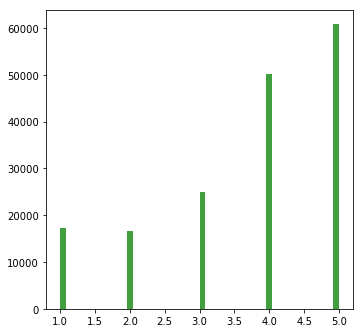

In [310]:
plt.hist(starCount,50, facecolor='green', alpha=0.75)
fig = plt.gcf()
fig.set_size_inches(5.5,5.5)

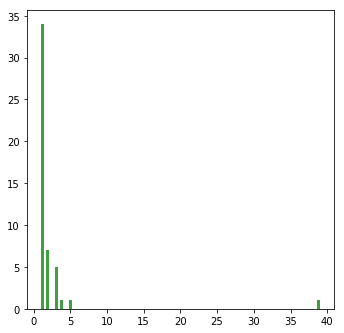

In [324]:
commonRest = np.array(commonRest)
commonRest = commonRest[commonRest != 0]
plt.hist(commonRest,100, facecolor='green', alpha=0.75)
fig = plt.gcf()
fig.set_size_inches(5.5,5.5)

In [31]:
friendCountList = list()
for key in megaUserFriendDict.keys():
    friendCountList.append(len(megaUserFriendDict.get(key)))

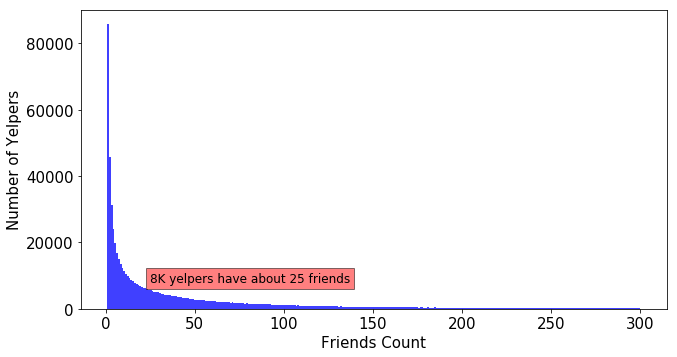

In [44]:
friendCountList = np.array(friendCountList)
friendCountListNonZero = friendCountList[friendCountList != 0]
friendCountListNonZero = friendCountListNonZero[friendCountListNonZero <= 300]
plt.hist(friendCountListNonZero,300, facecolor='blue', alpha=0.75)
plt.xlabel('Friends Count')
plt.ylabel('Number of Yelpers')
plt.rcParams.update({'font.size': 15})
plt.text(25,8000,'8K yelpers have about 25 friends',fontsize=12,bbox=dict(facecolor='red', alpha=0.5))
fig = plt.gcf()
fig.set_size_inches(10.5,5.5)

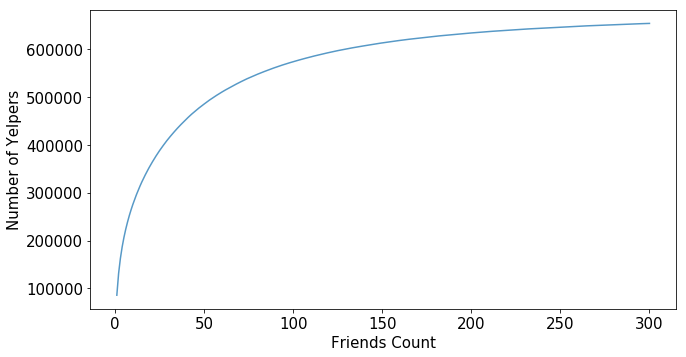

In [33]:
unique, counts = np.unique(friendCountListNonZero, return_counts=True)
counts = np.cumsum(counts)
plt.plot(unique,counts, alpha=0.75)
plt.xlabel('Friends Count')
plt.ylabel('Number of Yelpers')
plt.rcParams.update({'font.size': 15})
plt.text(25,20000,'20K yelpers have about 25 friends',fontsize=12,bbox=dict(facecolor='red', alpha=0.5))
fig = plt.gcf()
fig.set_size_inches(10.5,5.5)

In [187]:
def getUsefulFunnyCoolDict():
    megaUsefulDict = dict()
    userfile = open('user.json', 'r')
    for line in userfile:
        jsonObject = json.loads(line)
        usefulCount = jsonObject.get('useful') 
#         + jsonObject.get('funny') + jsonObject.get('cool')
        megaUsefulDict[jsonObject.get('user_id')] = usefulCount          
    userfile.close()
    return megaUsefulDict

In [188]:
megaUsefulDict = getUsefulFunnyCoolDict()

In [189]:
def getFriendUsefulList(megaUserFriendDict , megaUsefulDict):
    friendCount = list()
    usefulCount = list()
    for key in megaUserFriendDict.keys():
        if len(megaUserFriendDict.get(key)) <= 5000 and megaUsefulDict.get(key) <= 50000:
            friendCount.append(len(megaUserFriendDict.get(key)))
            usefulCount.append(megaUsefulDict.get(key))
    return np.array(friendCount), np.array(usefulCount)

In [190]:
friendCount , usefulCount = getFriendUsefulList(megaUserFriendDict, megaUsefulDict)

In [191]:
np.corrcoef(friendCount, usefulCount)[0][1]

0.35267729695104505

In [194]:
def plot(a,b):
    plt.scatter(a,b , s=1,c="purple")
    plt.xlabel("Number of Friends")
    plt.ylabel("Useful Reviews")
    fig = plt.gcf()
    fig.set_size_inches(10.5,5.5)
    plt.show()

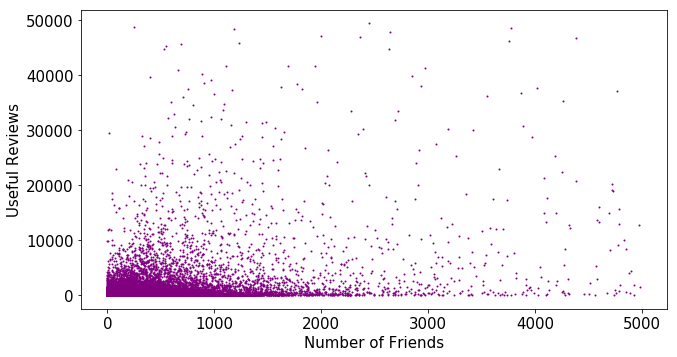

In [195]:
plot(friendCount , usefulCount)

In [27]:
import matplotlib.patches as mpatches

In [28]:
# userPlotList , friendPlotList , averagePlotList
uniqueUser, countsUser = np.unique(userPlotList, return_counts=True)
uniqueFriend, countsFriend = np.unique(friendPlotList, return_counts=True)
uniqueAverage, countsAverage = np.unique(averagePlotList, return_counts=True)

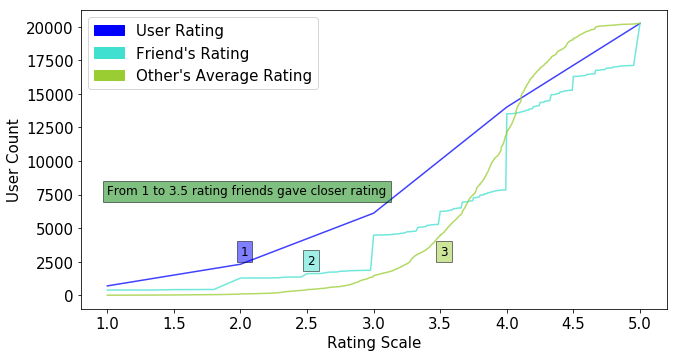

In [46]:
countsUserCum = np.cumsum(countsUser)
countsFriendCum = np.cumsum(countsFriend)
countsAverageCum = np.cumsum(countsAverage)
blue = mpatches.Patch(color = 'Blue',label="User Rating")
yellow = mpatches.Patch(color = 'turquoise',label="Friend's Rating")
green = mpatches.Patch(color = 'yellowgreen',label="Other's Average Rating")
plt.legend(handles=[blue,yellow,green])
plt.plot(uniqueUser,countsUserCum,c='blue',alpha=0.75)
plt.plot(uniqueFriend,countsFriendCum, c = 'turquoise',alpha=0.75)
plt.plot(uniqueAverage,countsAverageCum, c= 'yellowgreen',alpha=0.75)
plt.xlabel('Rating Scale')
plt.ylabel('User Count')
plt.rcParams.update({'font.size': 15})
plt.text(1,7500,'From 1 to 3.5 rating friends gave closer rating',fontsize=12,bbox=dict(facecolor='Green', alpha=0.5))
plt.text(2,3000,'1',fontsize=12,bbox=dict(facecolor='Blue', alpha=0.5))
plt.text(2.5,2300,'2',fontsize=12,bbox=dict(facecolor='turquoise', alpha=0.5))
plt.text(3.5,3000,'3',fontsize=12,bbox=dict(facecolor='yellowgreen', alpha=0.5))
fig = plt.gcf()
fig.set_size_inches(10.5,5.5)

In [1]:
a= 1
a

1